## Exercicio 1

### Data generation task

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
seed = 42
samples_per_class = 1000
rng = np.random.default_rng(seed)

In [4]:
mean_class0 = np.array([1.5, 1.5])
mean_class1 = np.array([5.0, 5.0])
cov   = np.array([[0.5, 0.0],[0.0, 0.5]])
X_class0 = rng.multivariate_normal(mean_class0, cov, size=samples_per_class)
X_class1 = rng.multivariate_normal(mean_class1, cov, size=samples_per_class)
X  = np.vstack([X_class0, X_class1])
y  = np.hstack([np.zeros(samples_per_class, dtype=int), np.ones(samples_per_class,  dtype=int)])


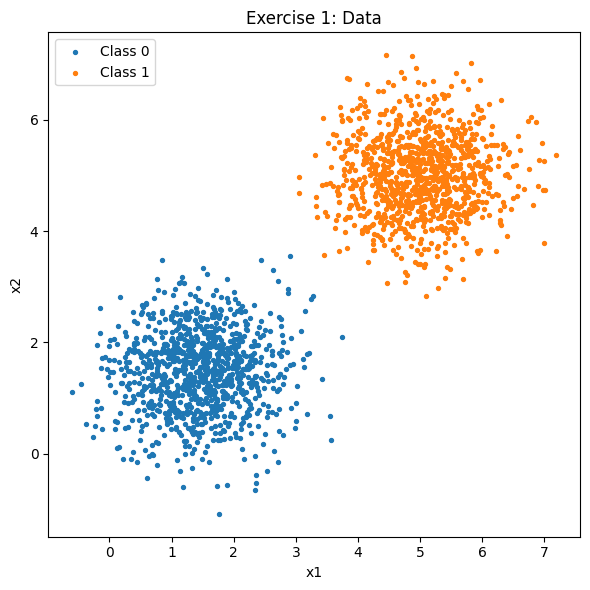

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(X[y==0,0], X[y==0,1], s=8, label="Class 0")
plt.scatter(X[y==1,0], X[y==1,1], s=8, label="Class 1")
plt.title("Exercise 1: Data")
plt.xlabel("x1"); plt.ylabel("x2")
plt.legend(); plt.tight_layout(); plt.show()


### Perceptron Implementation Task

In [6]:
lr=0.01 
max_epochs=100 


rng = np.random.default_rng(seed)
n, d = X.shape
w = np.zeros(d)
b = 0.0
acc_hist = []

for epoch in range(1, max_epochs+1):
    idx = np.arange(n)

    rng.shuffle(idx)
    updates = 0
    correct = 0

    for i in idx:
        z = np.dot(w, X[i]) + b
        y_hat = 1 if z >= 0 else 0
        e = y[i] - y_hat 
        if e != 0:
        
            w = w + lr * e * X[i]
            b = b + lr * e
            updates += 1
        else:
            correct += 1

        acc = correct / n
        acc_hist.append(acc)

        if updates == 0:
            break

Pesos finais w: [0.04894919 0.06400311]
Viés final b: -0.3200000000000001
Final accuracy on full dataset: 99.60%


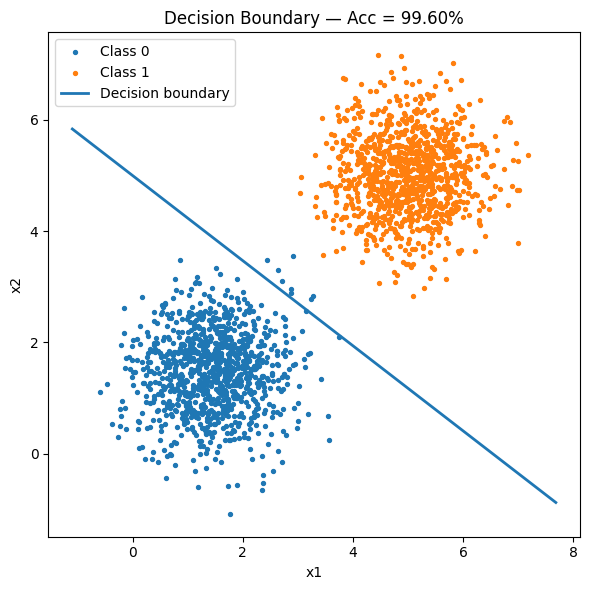

In [7]:
z_all = X @ w + b
y_pred = (z_all >= 0).astype(int)
final_acc = (y_pred == y).mean()
print("Pesos finais w:", w)
print("Viés final b:", b)
print(f"Final accuracy on full dataset: {final_acc*100:.2f}%")

plt.figure(figsize=(6,6))
plt.scatter(X[y==0,0], X[y==0,1], s=8, label="Class 0")
plt.scatter(X[y==1,0], X[y==1,1], s=8, label="Class 1")

if abs(w[1]) > 1e-12:
    X_class1_min, X_class1_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    xs = np.linspace(X_class1_min, X_class1_max, 200)
    ys = -(w[0]/w[1]) * xs - b / w[1]
    plt.plot(xs, ys, linewidth=2, label="Decision boundary")
else:
    x_line = -b / (w[0] + 1e-12)
    plt.axvline(x_line, linewidth=2, label="Decision boundary")

plt.title(f"Decision Boundary — Acc = {final_acc*100:.2f}%")
plt.xlabel("x1"); plt.ylabel("x2")
plt.legend(); plt.tight_layout(); plt.show()


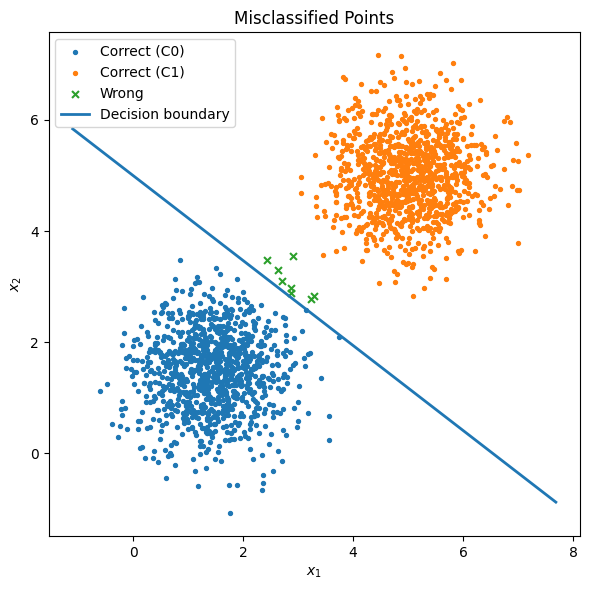

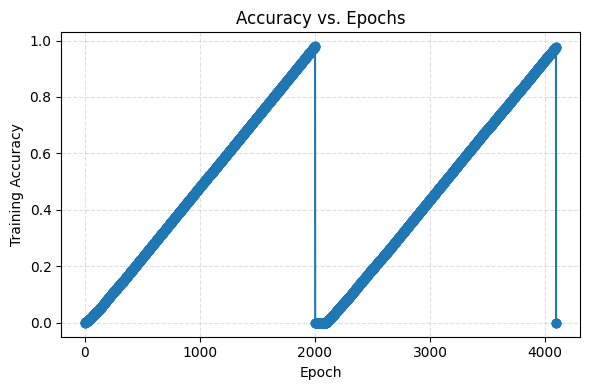

In [ ]:
wrong = (y_pred != y)
plt.figure(figsize=(6,6))
plt.scatter(X[~wrong & (y==0),0], X[~wrong & (y==0),1], s=8, label="Correct (C0)")
plt.scatter(X[~wrong & (y==1),0], X[~wrong & (y==1),1], s=8, label="Correct (C1)")
plt.scatter(X[wrong,0],          X[wrong,1],          s=25, marker="x", label="Wrong")

if abs(w[1]) > 1e-12:
    X_class1_min, X_class1_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    xs = np.linspace(X_class1_min, X_class1_max, 200)
    ys = -(w[0]/w[1]) * xs - b / w[1]
    plt.plot(xs, ys, linewidth=2, label="Decision boundary")
else:
    x_line = -b / (w[0] + 1e-12)
    plt.axvline(x_line, linewidth=2, label="Decision boundary")

plt.title("Misclassified Points")
plt.xlabel("$x_1$"); plt.ylabel("$x_2$")
plt.legend(); plt.tight_layout(); plt.show()


plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(acc_hist)+1), acc_hist, marker="o")
plt.xlabel("Epoch"); plt.ylabel("Training Accuracy")
plt.title("Accuracy vs. Epochs")
plt.grid(True, ls="--", alpha=0.4)
plt.tight_layout(); plt.show()

## Exercise 2

### Data Generation Task

In [16]:
mean_class0 = np.array([3.0, 3.0])
mean_class1 = np.array([4.0, 4.0])
cov   = np.array([[1.5, 0.0],[0.0, 1.5]])
X_class0 = rng.multivariate_normal(mean_class0, cov, size=samples_per_class)
X_class1 = rng.multivariate_normal(mean_class1, cov, size=samples_per_class)
X  = np.vstack([X_class0, X_class1])
y  = np.hstack([np.zeros(samples_per_class, dtype=int), np.ones(samples_per_class,  dtype=int)])

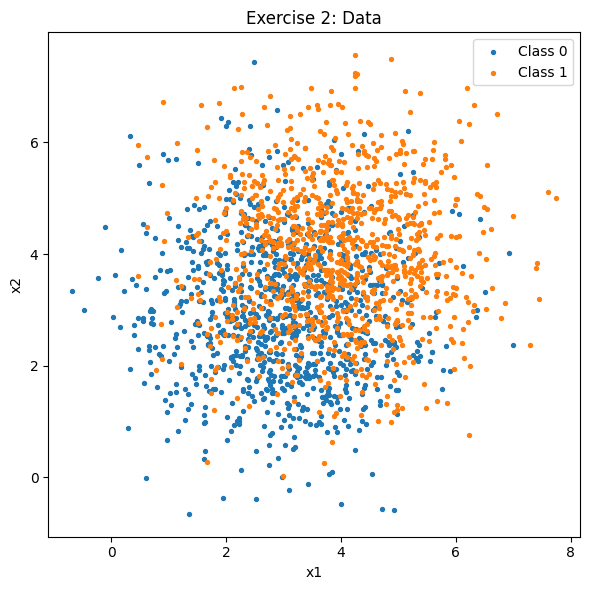

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(X[y==0,0], X[y==0,1], s=8, label="Class 0")
plt.scatter(X[y==1,0], X[y==1,1], s=8, label="Class 1")
plt.title("Exercise 2: Data")
plt.xlabel("x1"); plt.ylabel("x2")
plt.legend(); plt.tight_layout(); plt.show()


In [20]:
num_runs = 5
all_hist = []
final_accs = []
final_ws = []
final_bs = []

for run in range(num_runs):
    local_rng = np.random.default_rng(100 + run)

    w_r = local_rng.normal(0, 0.01, size=X.shape[1])
    b_r = 0.0

    acc_hist_r = []
    idx = np.arange(y.shape[0])

    for epoch in range(1, 101):  
        local_rng.shuffle(idx)
        updates = 0
        correct = 0

        for i in idx:
            xi = X[i]
            yi = y[i]
            z  = float(np.dot(w_r, xi) + b_r)
            yhat = 1 if z >= 0 else 0
            err  = int(yi - yhat)

            if err != 0:
                w_r = w_r + 0.01 * err * xi
                b_r = b_r + 0.01 * err
                updates += 1
            else:
                correct += 1

        acc = correct / len(y)
        acc_hist_r.append(acc)

        if updates == 0:  
            break

   
    all_hist.append(acc_hist_r)
    y_pred_r = ((X @ w_r + b_r) >= 0).astype(int)
    final_accs.append((y_pred_r == y).mean())
    final_ws.append(w_r.copy())
    final_bs.append(b_r)


max_len = max(len(h) for h in all_hist)
aligned = []
for h in all_hist:
    if len(h) < max_len:
        h = h + [h[-1]] * (max_len - len(h))
    aligned.append(h)

aligned = np.array(aligned)
mean_acc = aligned.mean(axis=0)
std_acc  = aligned.std(axis=0)


for i in range(num_runs):
    print(f"Run {i+1}:")
    print(f"  Final weights: {final_ws[i]}")
    print(f"  Final bias: {final_bs[i]}")
    print(f"  Final accuracy: {final_accs[i]*100:.2f}%")
    print()

print("Summary across runs:")
print("  Final accuracies:", [f"{a*100:.2f}%" for a in final_accs])
print(f"  Mean final accuracy: {np.mean(final_accs)*100:.2f}%")
print(f"  Std final accuracy: {np.std(final_accs)*100:.2f}%")


Run 1:
  Final weights: [-0.02059995  0.1328929 ]
  Final bias: -0.43000000000000016
  Final accuracy: 63.00%

Run 2:
  Final weights: [0.05533817 0.05429294]
  Final bias: -0.42000000000000015
  Final accuracy: 69.65%

Run 3:
  Final weights: [0.05812441 0.09586418]
  Final bias: -0.41000000000000014
  Final accuracy: 64.50%

Run 4:
  Final weights: [0.00919726 0.05628983]
  Final bias: -0.43000000000000016
  Final accuracy: 50.45%

Run 5:
  Final weights: [0.13061734 0.03119603]
  Final bias: -0.41000000000000014
  Final accuracy: 60.85%

Summary across runs:
  Final accuracies: ['63.00%', '69.65%', '64.50%', '50.45%', '60.85%']
  Mean final accuracy: 61.69%
  Std final accuracy: 6.32%


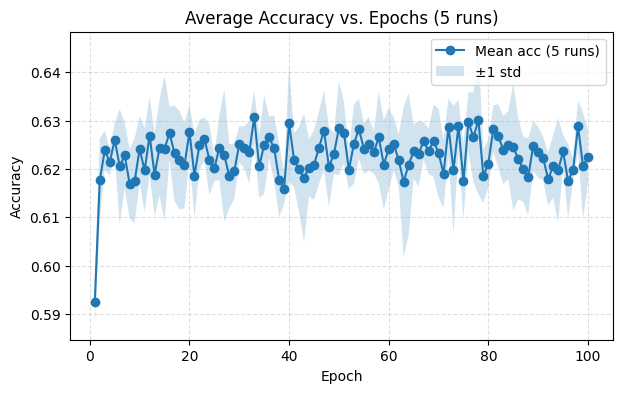

Final accuracies per run: ['63.00%', '69.65%', '64.50%', '50.45%', '60.85%']
Mean(final acc) = 61.69% ± 6.32%


In [21]:
plt.figure(figsize=(7,4))
epochs_axis = np.arange(1, max_len+1)
plt.plot(epochs_axis, mean_acc, marker="o", label="Mean acc (5 runs)")
plt.fill_between(epochs_axis, mean_acc-std_acc, mean_acc+std_acc, alpha=0.2, label="±1 std")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.title("Average Accuracy vs. Epochs (5 runs)")
plt.grid(True, ls="--", alpha=0.4); plt.legend(); plt.show()

print("Final accuracies per run:", [f"{a*100:.2f}%" for a in final_accs])
print(f"Mean(final acc) = {np.mean(final_accs)*100:.2f}% ± {np.std(final_accs)*100:.2f}%")